In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [34]:
path_train = 'C:\\Users\\swami\\OneDrive - Amrita university\\s2 projects\\MIS\\KNN and logistic regression\\'
    
pl_train = pd.read_csv(path_train+'Loan pred_train.csv')
pl_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
pl_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
pl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         600 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are all attributes with data type as object
* ApplicantIncome is a attribute with datatype as int64  
* CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History are attributes with datatype as float

In [37]:
pl_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Education, ApplicantIncome, CoapplicantIncome, Property_Area, Loan_Status do not have any null entries
* Gender contains 13 null entries
* Married contains 03 null entries
* Dependents contains 14 null entiries           
* Self_Employed contains 32 null entries
* LoanAmount contains 22 null entries
* Loan_Amount_Term contains 14 null entries
* Credit_History contains 50 null entries

# Addressing Missing values

In [38]:
# Running value counts on Gender for train
pl_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [39]:
pl_train['Gender'] = pl_train['Gender'].fillna('unknown')

In [40]:
# Value counts after fillna
pl_train['Gender'].value_counts()

Male       489
Female     112
unknown     13
Name: Gender, dtype: int64

In [41]:
pl_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [42]:
pl_train['Married'] = pl_train['Married'].fillna('unknown')

In [43]:
# Value counts of Married after fillna
pl_train['Married'].value_counts()

Yes        398
No         213
unknown      3
Name: Married, dtype: int64

In [44]:
# Running value counts on Dependents for train
pl_train['Dependents'].value_counts()

0     346
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [45]:
# FIlling max count value
pl_train['Dependents'] = pl_train['Dependents'].fillna('0')

In [46]:
# chaning 3+ to 3 for ease in future processing
pl_train['Dependents'] = pl_train['Dependents'].replace({'3+':3})

In [47]:
# Value Counts after fillna and chaning 3+ to 3
pl_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [48]:
pl_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [49]:
pl_train['Self_Employed'] = pl_train['Self_Employed'].fillna('unknown')

In [50]:
# Running Value conuts again after fillna
pl_train['Self_Employed'].value_counts()

No         500
Yes         82
unknown     32
Name: Self_Employed, dtype: int64

In [51]:
np.mean(pl_train['Loan_Amount_Term'])

342.0

In [52]:
# Replacing null values with mean of data
pl_train['Loan_Amount_Term'] = pl_train['Loan_Amount_Term'].fillna(342.0)

In [53]:
pl_train['Loan_Amount_Term'].isnull().sum()

0

In [54]:
# Running value counts on Credit_History for train
pl_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [55]:
# Creating additional category
pl_train['Credit_History'] = pl_train['Credit_History'].fillna(1.0)

In [56]:
# Running value counts on Loan Amount Terms
pl_train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [57]:
np.mean(pl_train['LoanAmount'])

146.41216216216216

In [58]:
#filling null values of Loan amount with mean(146.4)
pl_train['LoanAmount'] = pl_train['LoanAmount'].fillna(146.4)

In [59]:
pl_train['LoanAmount'].isnull().sum()

0

In [60]:
pl_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# changing Datatype of attributes

In [61]:
pl_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [62]:
mylist_train = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' , 'Loan_Status']

In [63]:
for i in mylist_train:
    pl_train[i] = pl_train[i].astype({i:'category'})

In [64]:
pl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 30.0+ KB


In [65]:
# Evaluating percentage of loan status to yes and no
pl_train['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

# Plotting Graphs

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


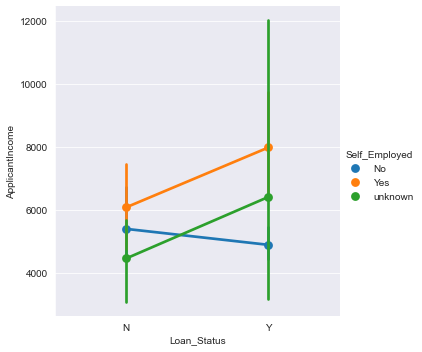

In [66]:
sns.factorplot('Loan_Status','ApplicantIncome', data=pl_train, hue='Self_Employed')

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


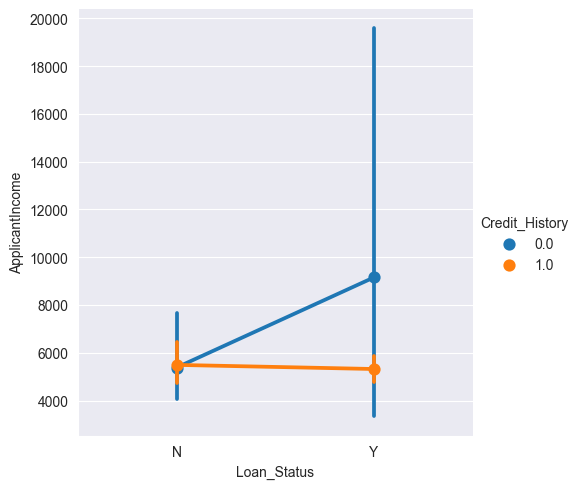

In [67]:
sns.factorplot('Loan_Status','ApplicantIncome', data=pl_train,hue='Credit_History')

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


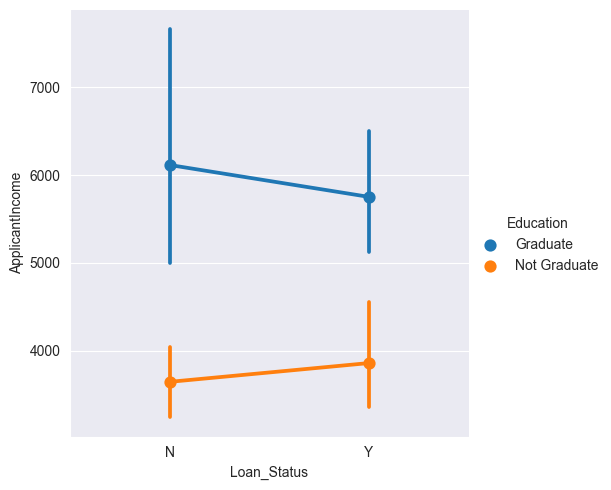

In [68]:
sns.factorplot('Loan_Status','ApplicantIncome', data=pl_train,hue='Education')

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


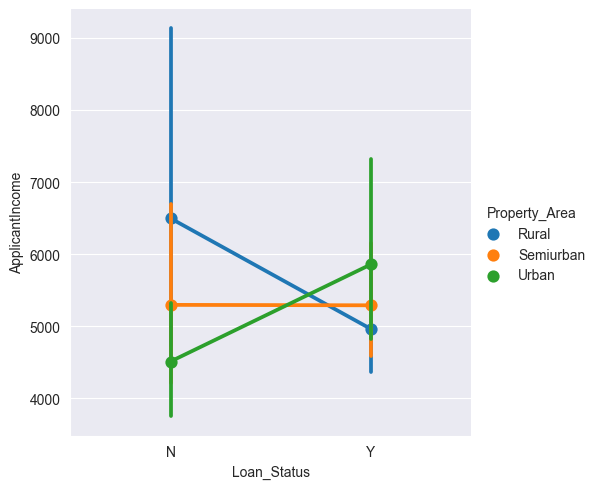

In [69]:
sns.factorplot('Loan_Status','ApplicantIncome', data=pl_train, hue='Property_Area')

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


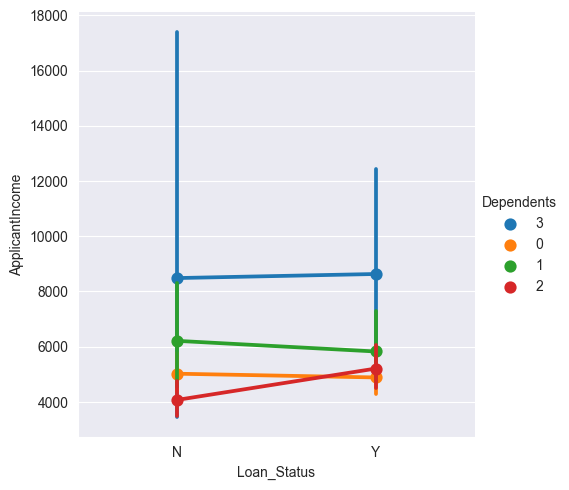

In [70]:
sns.factorplot('Loan_Status','ApplicantIncome', data=pl_train, hue='Dependents')

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


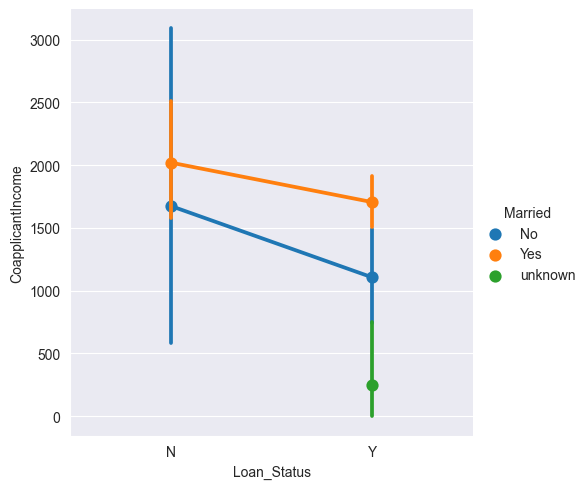

In [71]:
sns.factorplot('Loan_Status','CoapplicantIncome', data=pl_train, hue='Married')

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


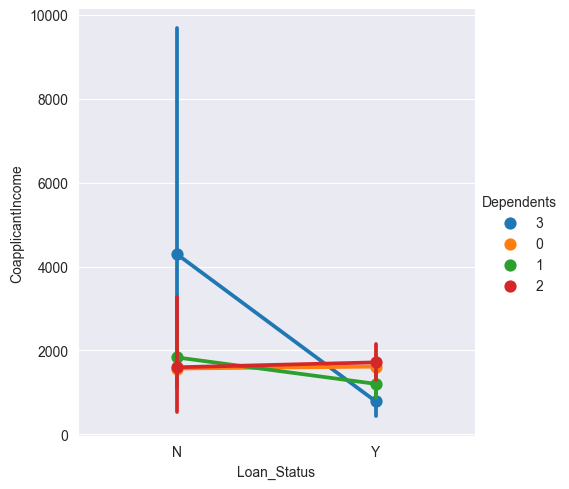

In [72]:
sns.factorplot('Loan_Status','CoapplicantIncome', data=pl_train, hue='Dependents')

* Converting categories to numbers for model learning

In [73]:
# Male = 0, Female = 1
pl_train['Gender'] = pl_train['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})

In [74]:
# Yes = 1, No = 0
pl_train['Married'] = pl_train['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})

In [75]:
# Graduate = 1, Not Graduate = 0
pl_train['Education'] = pl_train['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})

In [76]:
# Yes: 1
# No : 0
# unknown:2
pl_train['Self_Employed'] = pl_train['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})

In [77]:
pl_train['Property_Area'] = pl_train['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})

In [78]:
pl_train['Loan_Status'] = pl_train['Loan_Status'].replace({'Y':1, 'N':0})

# ML Model

In [79]:
pl_train = pl_train.drop(columns=['Loan_ID'])

In [80]:
X_train = pl_train.drop(columns=['Loan_Status'])

In [81]:
y_train = pl_train['Loan_Status']

In [82]:
lr = LogisticRegression()

In [83]:
lr.fit(X_train,y_train)

C:\Users\swami\OneDrive - Amrita university\s2 projects\MIS\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
lr.score(X_train,y_train)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_train,y_train)